# Setup

In [69]:
pip install ipywidgets mlcroissant nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [nltk]2/3 [nltk]
Note: you may need to restart the kernel to use updated packages.


In [70]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Data Initialization

In [71]:
data_path = 'FilmSent/new_rotten_tomatoes_dataset.json'
try:
    df = pd.read_json(data_path)
    print(f"Data loaded!")
except Exception as e:
    print(f"Error loading data: {e}")

Data loaded!


# Data Cleaning

In [72]:
# Get a shot of the first 3 entries
print(df.head(3))
print(df.columns)

# Describe the dataset
print("This is the description of the full dataset\n", df.describe())

                      title  year                                 emsId  \
0           Prisoner of War  2025  58c6801a-d7d0-49d4-a200-07e9f8e6004f   
1         War of the Worlds  2025  2828f421-1ed7-430d-94c3-e19235ba0d43   
2  Female War: A Nasty Deal  2015  05b14108-fbb6-3e04-86f7-cdc2d40bef0b   

                    vanity   type  critics_score  audience_score  \
0          prisoner_of_war  movie           67.0             NaN   
1   war_of_the_worlds_2025  movie            4.0            20.0   
2  female_war_a_nasty_deal  movie            NaN            83.0   

                                           genres directors  \
0               [Action, Mystery & Thriller, War]        []   
1  [Sci-Fi, Adventure, Drama, Mystery & Thriller]        []   
2                                         [Drama]        []   

                                                cast  \
0  [{'role': 'Actor', 'emsId': 'c8ab0109-b9e3-318...   
1  [{'role': 'Actor', 'emsId': 'c745b7d3-1c29-394...   
2  [{

In [73]:
# Remove the entries with missing scores
df_cleaned = df.dropna(subset=['critics_score', 'audience_score'])
# Describe the cleaned dataset
print("This is the description of the reduced dataset\n", df_cleaned.describe())

This is the description of the reduced dataset
               year  critics_score  audience_score
count  2596.000000    2596.000000     2596.000000
mean   2006.675270      66.803929       67.567797
std      19.098661      27.048541       20.542742
min    1919.000000       0.000000        7.000000
25%    2000.000000      47.000000       53.000000
50%    2013.000000      74.000000       72.000000
75%    2021.000000      90.000000       85.000000
max    2025.000000     100.000000      100.000000


# Exploratory Analysis

<Axes: >

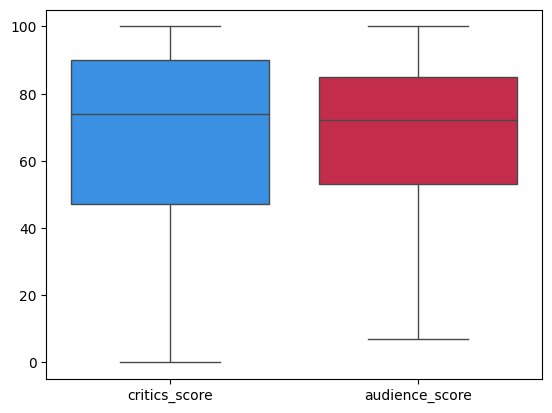

In [74]:
sns.boxplot(data=df_cleaned[['critics_score', 'audience_score']], palette=['dodgerblue', 'crimson'])

In [ ]:
# Plot the scores
plt.figure(figsize=(10, 5))

# Histogram for critics_score
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['critics_score'], kde=True, color='dodgerblue')
plt.title('Distribution of Critics Score')

# Histogram for audience_score
plt.subplot(1, 2, 2)
sns.histplot(df_cleaned['audience_score'], kde=True, color='crimson')
plt.title('Distribution of Audience Score')

plt.tight_layout()
plt.savefig('histograms.png')  # Save the figure
plt.show()

Notice that both distributions are skewed to the right i.e. a higher count of high-scored films.

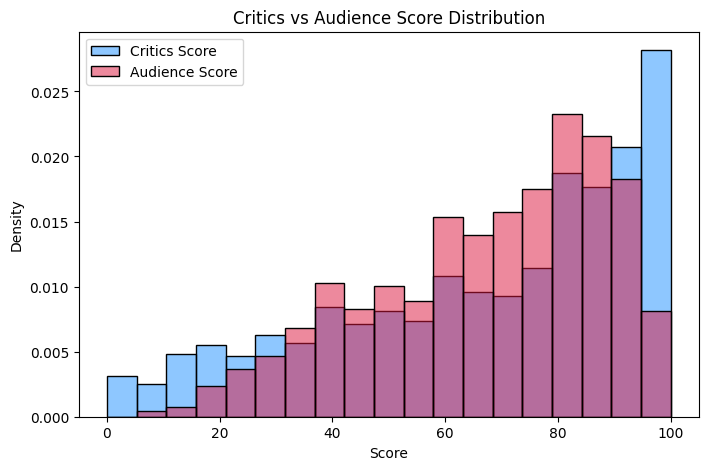

In [47]:
# Superimpose the plots for easier analysis

plt.figure(figsize=(8, 5))

# Create common bins
bins = np.linspace(
    min(df_cleaned['critics_score'].min(), df_cleaned['audience_score'].min()),
    max(df_cleaned['critics_score'].max(), df_cleaned['audience_score'].max()),
    20
)

sns.histplot(
    df_cleaned['critics_score'],
    bins=bins,
    stat='density',
    alpha=0.5,
    label='Critics Score',
    color='dodgerblue'
)

sns.histplot(
    df_cleaned['audience_score'],
    bins=bins,
    stat='density',
    alpha=0.5,
    label='Audience Score',
    color='crimson'
)

plt.title('Critics vs Audience Score Distribution')
plt.xlabel('Score')
plt.ylabel('Density')
plt.legend()
plt.show()


Let's take a look at the extremes–scores of 0 and 100. We see that there is a larger number of critics that scored movies at the extremes than the audience. However, we see that the audience tended to score the movies at values in the approximate range of 55-90.

From this we can infer that critics may be more comfortable expressing strong dislike and like towards films, whereas the audience may be more apprehensive of giving extreme scores.

In [57]:
df_cleaned[['critics_score', 'audience_score']].corr()

,critics_score,audience_score
critics_score,1.000000,0.639241
audience_score,0.639241,1.000000


<Axes: xlabel='count', ylabel='avg_score'>

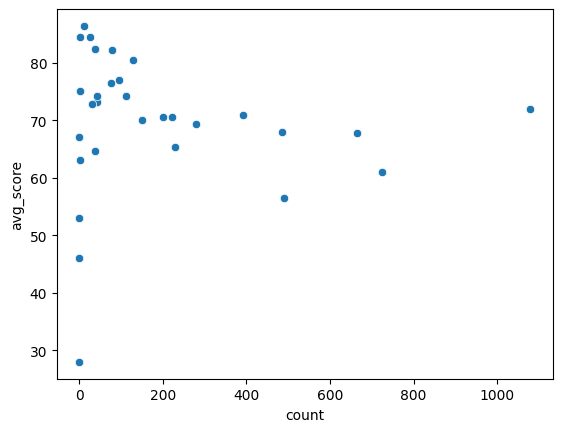

In [68]:
df_genres = df_cleaned.explode('genres')
genre_stats = df_genres.groupby('genres').agg(
    avg_score=('audience_score', 'mean'),
    count=('audience_score', 'size')
)
sns.scatterplot(
    x='count',
    y='avg_score',
    data=genre_stats
)

In [62]:
print(df_cleaned['genres'])

1       [Sci-Fi, Adventure, Drama, Mystery & Thriller]
3                                     [Action, Comedy]
6                                        [War, Comedy]
7                                         [Drama, War]
10                         [Horror, Action, Adventure]
                             ...                      
3563                      [Horror, Mystery & Thriller]
3564                                           [Drama]
3584                                          [Horror]
3588                                           [Drama]
3591                       [Drama, Mystery & Thriller]
Name: genres, Length: 2596, dtype: object
